# Moltres problems

## Note that some problems with analytic solutions may also (or exclusively) be discussed in the `solve_1d_advection_diffusion_equation_notebook`.

## scalar-advection.i (<i>successful convergence to steady state</i>)

This problem solves the 1D advection equation with a constant source, e.g. it solves the differential equation:

\begin{equation}
\frac{du}{dx} = 1
\end{equation}

Basis functions are CONSTANT MONOMIALs. 

## 1d_dg_advection_diffusion (<i>successful convergence to steady state</i>)

Solves:

\begin{equation}
\frac{\partial u}{\partial t} - \frac{\partial^2 u}{\partial x^2} + \frac{\partial u}{\partial x} = 1
\end{equation}

with boundary conditions:
\begin{equation}
u(0) = 0 \\
u(1) = 1
\end{equation}

Changing the `nl_rel_tol` from 1e-6 to 1e-2 changes the number of time steps to get to 1 second from over 5000 to 781. Problem did not reach steady state by one second, however it did by two seconds. Note that this problem formulation shows undershoots during the initial time steps on the right side of the domain, most likely because we are starting from an initial condition of u(x, 0) = 0 but with a Dirichlet boundary condition of u(1, t) = 1 at the RHS boundary. Perhaps with rDG(P0P1) we would not observe these oscillations; however with DG(P1) (what we are using here), we most certainly do.

## 1d_dg_advection_diffusion_outlet_neumann

Solves:

\begin{equation}
\frac{\partial u}{\partial t} - \frac{\partial^2 u}{\partial x^2} + \frac{\partial u}{\partial x} = 1
\end{equation}

with boundary conditions:
\begin{equation}
u(0) = 0 \\
\frac{\partial u}{\partial x}\Bigr|_{x=1} = 0
\end{equation}

The analytic solution to the corresponding steady-state equation is:

\begin{equation}
u(x) = -(e - 1)*e^{-1} + x - e^{x - 1} + 1\\
\frac{du}{dx} = -e^{x - 1} + 1\\
\frac{d^2u}{dx^2} = -e^{x-1}\\
- \frac{\partial^2 u}{\partial x^2} + \frac{\partial u}{\partial x} = e^{x-1} - e^{x-1} + 1 = 1
\end{equation}

Upon simplification:

\begin{equation}
u(x) = x + e^{-1} - e^{x - 1}
\end{equation}

as determined by sage math in the local notebook `solve_1d_advection_diffusion_equation`. By inspection, it's clear that the governing equation is satisfied as well as the boundary conditions. So we have a clear, correct analytic solution that we need to try and reproduce with our numerical methods in MOOSE. So far, the numerical solution is tending towards u(x) = x, which is wrong. So the question is to figure out why. Alright now we get a perfect result with DG! And we can run in Steady mode even with the FDP preconditioner. Something is clearly wrong with the user provided Jacobians. That's a debugging issue for tomorrow.


## 1d_cg_advection_diffusion_outlet_neumann

Solves:

\begin{equation}
\frac{\partial u}{\partial t} - \frac{\partial^2 u}{\partial x^2} + \frac{\partial u}{\partial x} = 1
\end{equation}

with boundary conditions:
\begin{equation}
u(0) = 0 \\
\frac{\partial u}{\partial x}\Bigr|_{x=1} = 0
\end{equation}

The analytic solution to the corresponding steady-state equation is:

\begin{equation}
u(x) = -(e - 1)*e^{-1} + x - e^{x - 1} + 1\\
\frac{du}{dx} = -e^{x - 1} + 1\\
\frac{d^2u}{dx^2} = -e^{x-1}\\
- \frac{\partial^2 u}{\partial x^2} + \frac{\partial u}{\partial x} = e^{x-1} - e^{x-1} + 1 = 1
\end{equation}

Upon simplification:

\begin{equation}
u(x) = x + e^{-1} - e^{x - 1}
\end{equation}

as determined by sage math in the local notebook `solve_1d_advection_diffusion_equation`. By inspection, it's clear that the governing equation is satisfied as well as the boundary conditions. So we have a clear, correct analytic solution that we need to try and reproduce with our numerical methods in MOOSE. So far, the numerical solution is tending towards u(x) = x, which is wrong, **just like for the above dg case**. Given that, it seems likely that the issue in terms of accuracy is not the dg formulation. I'm tending to believe it must be the right boundary condition because recall that u(x) = x is a possible solution to the second order ODE pending boundary conditions. And the LHS BC is holding true. It's the RHS BC that is being violated. So...the issue was that I had changed my diffusion coefficient to .1, so actually the solve was perfect for CG! Now with diffusion coefficient changed to 1, I am getting the exactly correct analytical solution as predicted by `Sage`.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

/home/al007/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
data = np.loadtxt("residual_data.txt")

In [4]:
data

array([[  0.00000000e+00,   3.00487600e-02],
       [  1.00000000e+00,   4.06049400e-03],
       [  2.00000000e+00,   1.50606600e-03],
       [  3.00000000e+00,   4.18862200e-04],
       [  4.00000000e+00,   2.30923300e-04],
       [  5.00000000e+00,   9.61072900e-05],
       [  6.00000000e+00,   5.53597700e-05],
       [  7.00000000e+00,   2.77124500e-05],
       [  8.00000000e+00,   1.58282800e-05],
       [  9.00000000e+00,   8.56284800e-06],
       [  1.00000000e+01,   4.88907200e-06],
       [  1.10000000e+01,   2.73969200e-06],
       [  1.20000000e+01,   1.57062700e-06],
       [  1.30000000e+01,   8.95200600e-07],
       [  1.40000000e+01,   5.15306700e-07],
       [  1.50000000e+01,   2.96176600e-07],
       [  1.60000000e+01,   1.70979100e-07],
       [  1.70000000e+01,   9.86809500e-08],
       [  1.80000000e+01,   5.70670200e-08],
       [  1.90000000e+01,   3.30044800e-08],
       [  2.00000000e+01,   1.91053900e-08]])

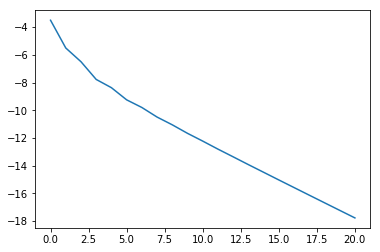

In [7]:
iteration_num = data[:,0]
residuals = np.log(data[:,1])
plt.plot(iteration_num, residuals)
plt.show()

## edge4

This problem was built to test whether libMesh supported EDGE4 elements for third order LAGRANGE and L2_LAGRANGE polynomials. The answer is no. However, libMesh does support EDGE3 elements for second order LAGRANGE and L2_LAGRANGE polys. 

## 2d_advection_diffusion_mimic_msr

This is a 2D test case mean to mimic the convection-diffusion properties of the MSR model. There is a fuel region with advection and a source and then there is a moderator region with only diffusion. Boundary conditions are Dirichlet at the bottom foundary (both fuel and moderator) and then an outflow condition at the fuel top. Everywhere else is insulated. Results look good. Able to achieve steady-state for velocity ranging from 1e-3 to 1e3 while diffusion coefficient and source coefficient stay constant at 1. However, there is a negative value somewhere in the domain, which should not be the case. Ok the negative values were on the graphite_bottom portion of the domain. Negative values were observed for monomial basis functions with sigma = 6 and 60. However, with l2_lagrange, negative values were not observed for sigma = 60 or 6. Hmm, might be time to try that tomorrow with the actual MSR temperature simulation...